## **Data Exploration**

There are a total of 23 features in this dataset which are:

|Feature Name|Description|Data Type|
|-|-|-|
|<font color='green'>CLIENTNUM</font>|Unique identifier for the customer holding the account|
|<font color='green'>Attrition_Flag</font>|Internal event (customer activity) variable (Existing = 1, Attrited = 0)|<font color='red'>Categorical</font> [Output]|
|<font color='green'>Customer_Age</font>|Customer's Age in Years|<font color='red'>Numerical</font>|
|<font color='green'>Gender</font>|(M = Male, F = Female)|<font color='red'>Categorical</font>|
|<font color='green'>Dependent_Count</font>|Number of dependents|<font color='red'>Numerical</font>|
|<font color='green'>Education_Level</font>|Educational Qualification of the account holder (Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, Unknown)|<font color='red'>Categorical</font>|
|<font color='green'>Marital_Status</font>|(Married, Single, Divorced, Unknown)|<font color='red'>Categorical</font>|
|<font color='green'>Income_Category</font>|Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K)|<font color='red'>Categorical</font>|
|<font color='green'>Card_Category</font>|Type of Card (Blue, Silver, Gold, Platinum)</font>|<font color='red'>Categorical</font>|
|<font color='green'>Months_on_book</font>|Period of relationship with bank|<font color='red'>Numerical</font>|
|<font color='green'>Total_Relationship_Count</font>|Total no. of products held by the customer|<font color='red'>Numerical</font>|
|<font color='green'>Months_Inactive_12_mon</font>|No. of months inactive in the last 12 months|<font color='red'>Numerical</font>|
|<font color='green'>Contacts_Count_12_mon</font>|No. of Contacts in the last 12 months|<font color='red'>Numerical</font>|
|<font color='green'>Credit_Limit</font>|Credit Limit on the Credit Card|<font color='red'>Numerical</font>|
|<font color='green'>Total_Revolving_Bal</font>|Total Revolving Balance on the Credit Card|<font color='red'>Numerical</font>|
|<font color='green'>Avg_Open_To_Buy</font>|Open to Buy Credit Line (Average of last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Amt_Chng_Q4_Q1</font>|Change in Transaction Amount (Q4 over Q1)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Trans_Amt</font>|Total Transaction Amount (Last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Trans_Ct</font>|Total Transaction Count (Last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Ct_Chng_Q4_Q1</font>|Change in Transaction Count (Q4 over Q1)|<font color='red'>Numerical</font>|
|<font color='green'>Avg_Utilization_Ratio</font>|Average Card Utilization Ratio|<font color='red'>Numerical</font>|
|<font color='green'>Naive_Bayes_Classifier...</font>|Naive Bayes||
|<font color='green'>Naive_Bayes_Classifier...</font>|Naive Bayes||

### **Import Necessary Libraries**

In [578]:
from HW1def import *

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

from sklearn.feature_selection import SelectKBest, chi2

# ignore warnings
warnings.filterwarnings('ignore')

### **Import Dataset**

In [579]:
dfOri = df = pd.read_csv('HWdata/credit_card_churn.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [580]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [581]:
df.shape

(10127, 23)

We can see that this dataset has 23 features and 10127 data.

In [582]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [583]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

### **Drop Unnecessary Features**

Since '<font color='orange'>CLIENTNUM</font>' is a unique classifier for each customer, we will drop this feature.
The last 2 features, '<font color='orange'>Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1</font>' and '<font color='orange'>Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2</font>', are for Naive Bayes Classifier, which we won't be using in this assignment, we will also drop these features.


In [584]:
df.drop(
['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
axis=1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [585]:
df.shape

(10127, 20)

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

After dropping the unnecessary features, we are left with 20 features.

In which, there are:

- 6 features that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 14 features that are '<font color='green'>int64</font>' and '<font color='green'>float64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features
3. Output

**Separate Numerical Features from Dataset**

In [587]:
dfNum = df.select_dtypes(include=['int64', 'float64'])

**Separate Categorical Features from Dataset**

In [588]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,1:]

**Separate Output from Dataset**

In [589]:
dfOut = df.iloc[:,0:1]

**Concatenate Separated Data**

In [590]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer': 0})
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,M,Graduate,Single,$40K - $60K,Blue,1
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


# Benchmark

In [591]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#get the dummy variables for the categorical variables
dfbm = pd.get_dummies(df)

xbm = dfbm.drop(['Attrition_Flag'], axis = 1)
ybm = dfbm['Attrition_Flag']

xbm_train,xbm_test,ybm_train,ybm_test = train_test_split(xbm,ybm,test_size = 0.2,random_state = 0)

clfbm = LogisticRegression()
clfbm.fit(xbm,ybm)
print("model score: %.8f" % clfbm.score(xbm_test, ybm_test))

model score: 0.87907206


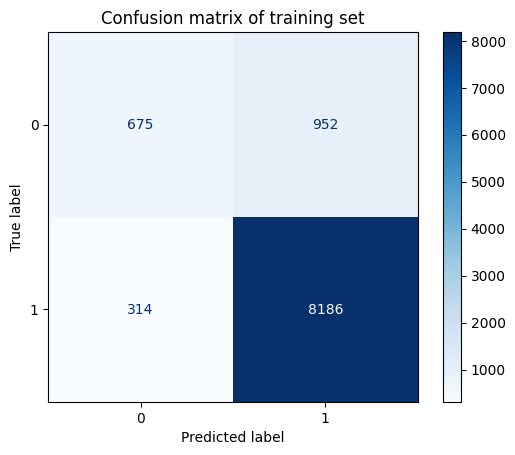

In [592]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clfbm,
                      xbm,
                      ybm,
                      display_labels=list(set(ybm_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [593]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
ybm_pred = clfbm.predict(xbm)
print("Classification report \n=======================")
print(classification_report(y_true=ybm, y_pred=ybm_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm, y_pred=ybm_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.68      0.41      0.52      1627
           1       0.90      0.96      0.93      8500

    accuracy                           0.87     10127
   macro avg       0.79      0.69      0.72     10127
weighted avg       0.86      0.87      0.86     10127

Confusion matrix 
[[ 675  952]
 [ 314 8186]]


### **Check Values of Numerical Features**

In [594]:
df.isnull().sum()

Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Attrition_Flag              0
dtype: int64

In [595]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

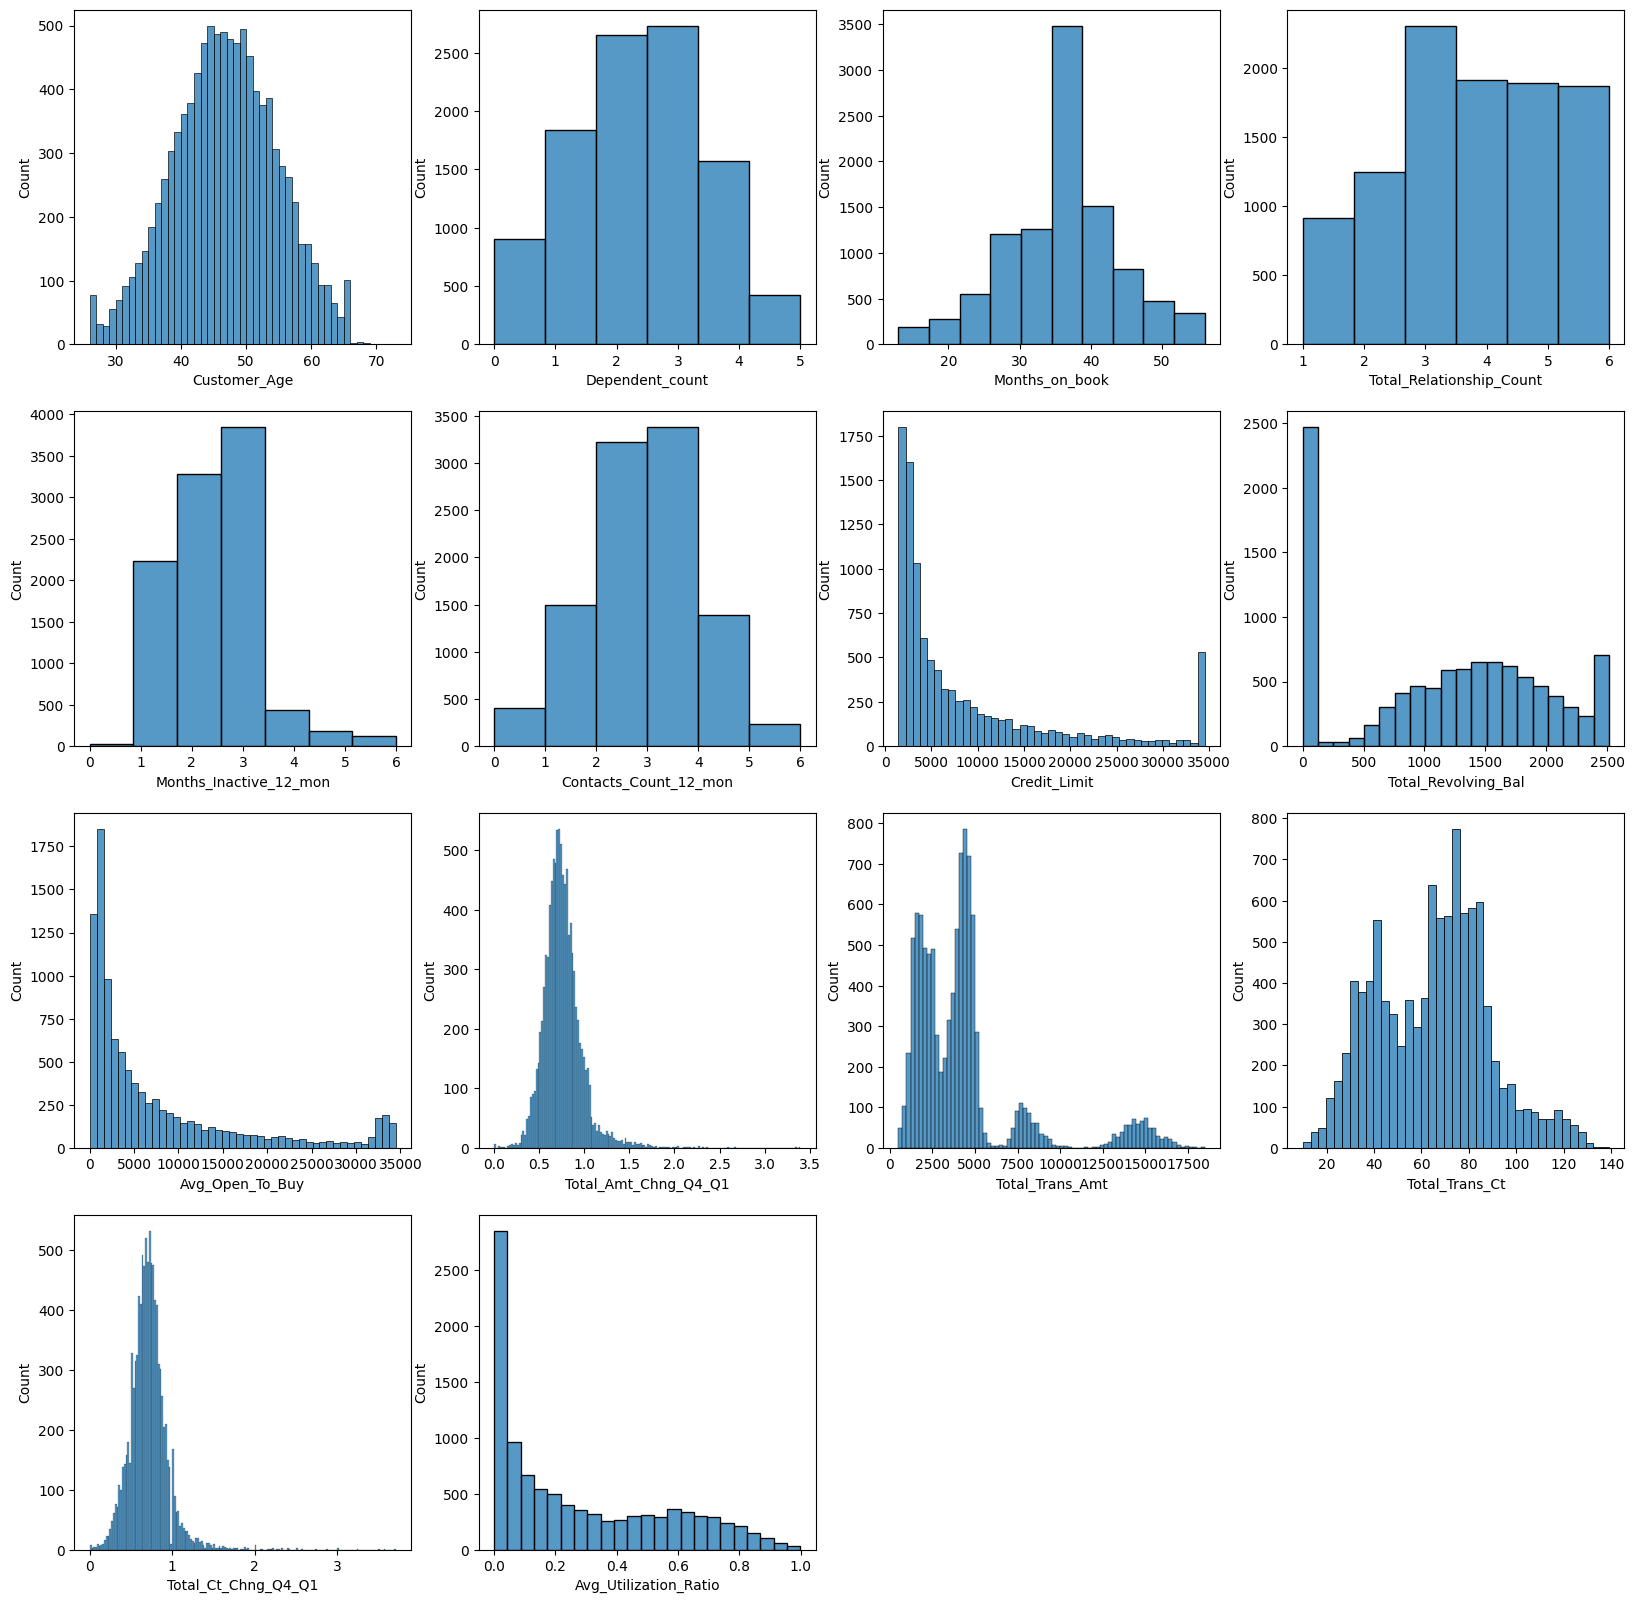

In [596]:
# plot numerical data
plt.figure(figsize=(20,20))
plt.subplot(441) 
sns.histplot(df['Customer_Age'])
plt.subplot(442) 
sns.histplot(df['Dependent_count'],bins=6)
plt.subplot(443) 
sns.histplot(df['Months_on_book'],bins=10)
plt.subplot(444) 
sns.histplot(df['Total_Relationship_Count'],bins=6)
plt.subplot(445) 
sns.histplot(df['Months_Inactive_12_mon'],bins=7)
plt.subplot(446) 
sns.histplot(df['Contacts_Count_12_mon'],bins=6)
plt.subplot(447) 
sns.histplot(df['Credit_Limit'])
plt.subplot(448) 
sns.histplot(df['Total_Revolving_Bal'])
plt.subplot(449) 
sns.histplot(df['Avg_Open_To_Buy'])
plt.subplot(4,4,10) 
sns.histplot(df['Total_Amt_Chng_Q4_Q1'])
plt.subplot(4,4,11)
sns.histplot(df['Total_Trans_Amt'])
plt.subplot(4,4,12)
sns.histplot(df['Total_Trans_Ct'])
plt.subplot(4,4,13)
sns.histplot(df['Total_Ct_Chng_Q4_Q1'])
plt.subplot(4,4,14)
sns.histplot(df['Avg_Utilization_Ratio'])

What we got from plotting values of numerical features:

|Feature Names|Normally Distributed|
|-|-|
|Customer_Age|Yes|
|Dependent_Count|Yes|
|Months_on_book|Yes|
|Total_Relationship_Count|No|
|Months_Inactive_12_mon|Almost|
|Contacts_Count_12_mon|Yes|
|Credit_Limit|No|
|Total_Revolving_Bal|No|
|Avg_Open_To_Buy|No|
|Total_Amt_Chng_Q4_Q1|Almost|
|Total_Trans_Amt|No|
|Total_Trans_Ct|Almost|
|Total_Ct_Chng_Q4_Q1|Almost|
|Avg_Utilization_Ratio|No|

### **Check Values of Categorical Features**

In [597]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [598]:
# Calculate Percentage of Gender
100*df['Gender'].value_counts()/len(df)

F    52.908068
M    47.091932
Name: Gender, dtype: float64

In [599]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [600]:
# Calculate Percentage of Education Level
100*df['Education_Level'].value_counts()/len(df)

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

In [601]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [602]:
# Calculate Percentage of Marital Status
100*df['Marital_Status'].value_counts()/len(df)

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

In [603]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [604]:
# Calculate Percentage of Income Category
100*df['Income_Category'].value_counts()/len(df)

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64

In [605]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [606]:
# Calculate Percentage of Card Category
100*df['Card_Category'].value_counts()/len(df)

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

<AxesSubplot:title={'center':'Card Category'}>

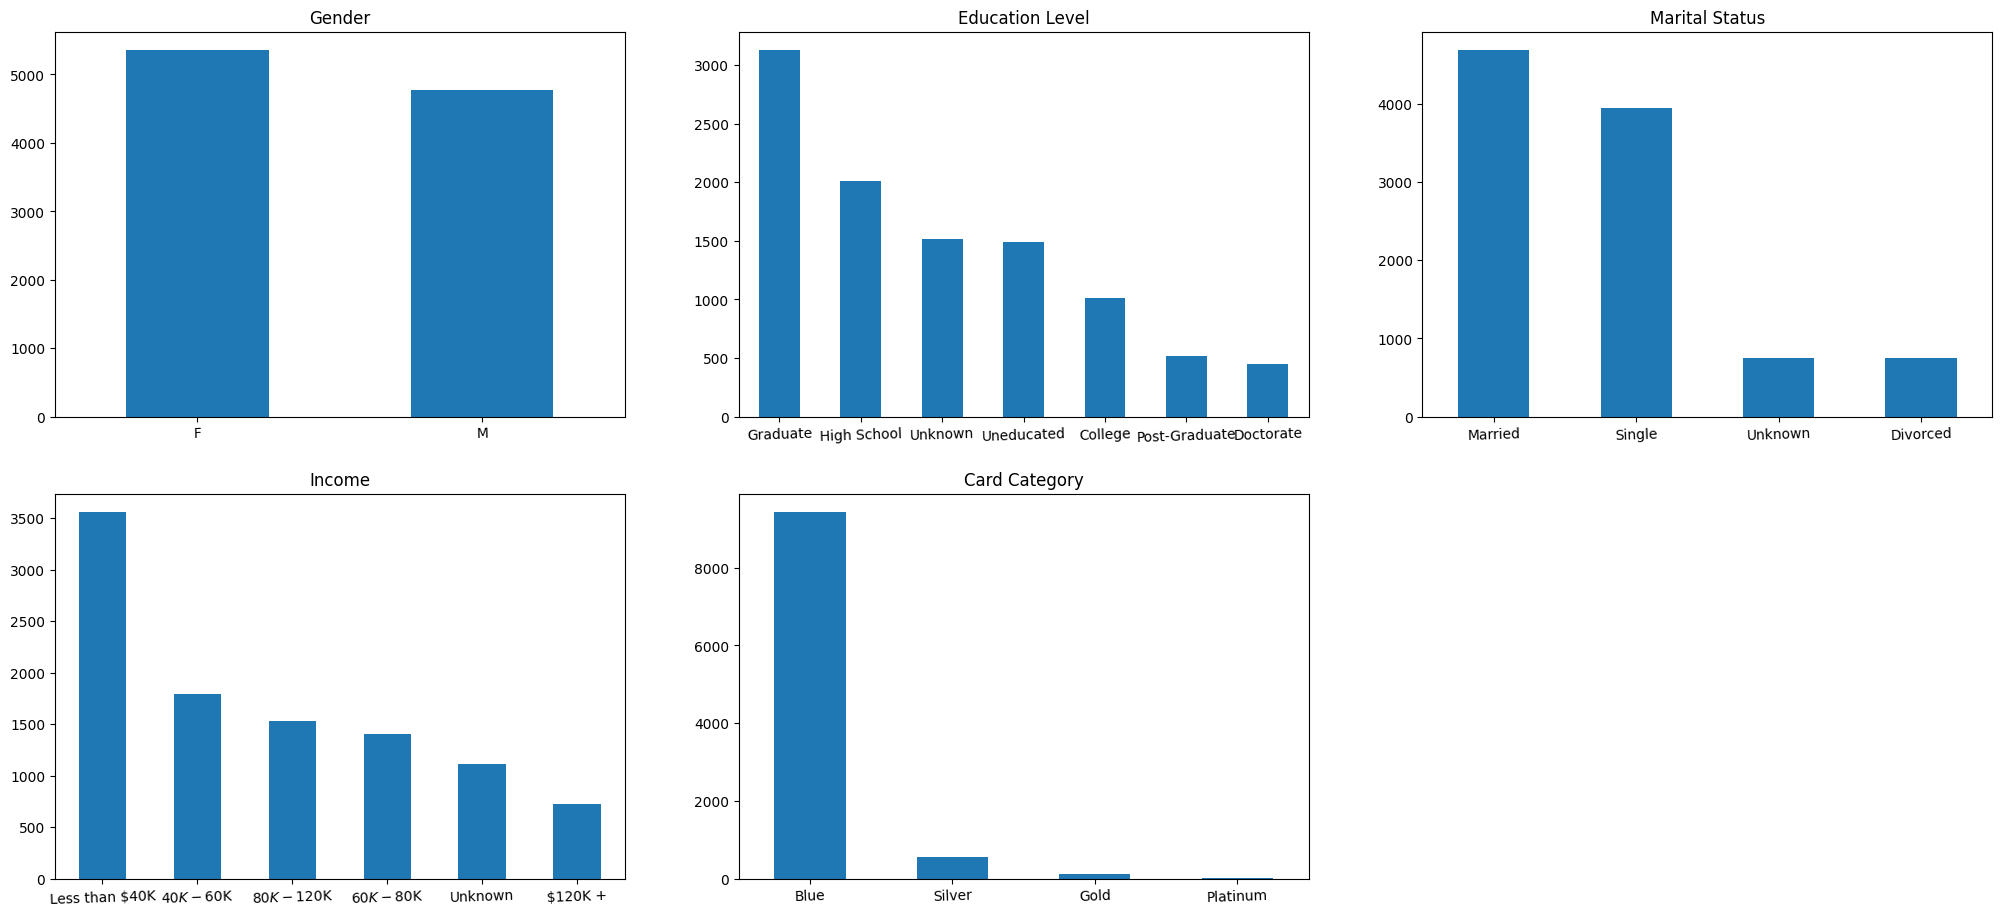

In [607]:
# plot categorical data
plt.figure(figsize=(25,11))
plt.subplot(231) 
df['Gender'].value_counts(normalize=False).plot.bar(title= 'Gender',rot=2) 
plt.subplot(232) 
df['Education_Level'].value_counts(normalize=False).plot.bar(title= 'Education Level',rot=2) 
plt.subplot(233) 
df['Marital_Status'].value_counts(normalize=False).plot.bar(title= 'Marital Status',rot=2)
plt.subplot(234) 
df['Income_Category'].value_counts(normalize=False).plot.bar(title= 'Income',rot=2)
plt.subplot(235) 
df['Card_Category'].value_counts(normalize=False).plot.bar(title= 'Card Category',rot=2)

What we got from plotting values of categorical features:

|Feature Names|What we got|
|-|-|
|Gender|There are nearly the same amount of male and female.|
|Education_Level|Most of the people in this dataset are 'Graduate' and around 15% of the people are 'Unknown'|
|Marital_Status|46% of this data are 'Married', 39% are 'Single' and the rest are 'Unknown' or 'Divorced'|
|Income_Category|Most people in this dataset have 'less than 40K' income|
|Card_Category|People in this dataset mostly hold blue cards (more than 93%) and the rest hold the other 3 cards (less than 7%).|

Good and Bad things of this dataset:

|Good Things|Explanation|
|-|-|
|Data Distribution|Most Numerical data are normally distributed.|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|

<hr>

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation, eg. Avg_Open_To_Buy.|
|'Card_Category' Features|This feature's data are mostly 'Blue' (around 93%).|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a credit card dataset, which can be considered as a dataset provided by a bank, those 'Unknown' data might be undisclosed information of the customers.

### **Check Correlation between Numerical Features**

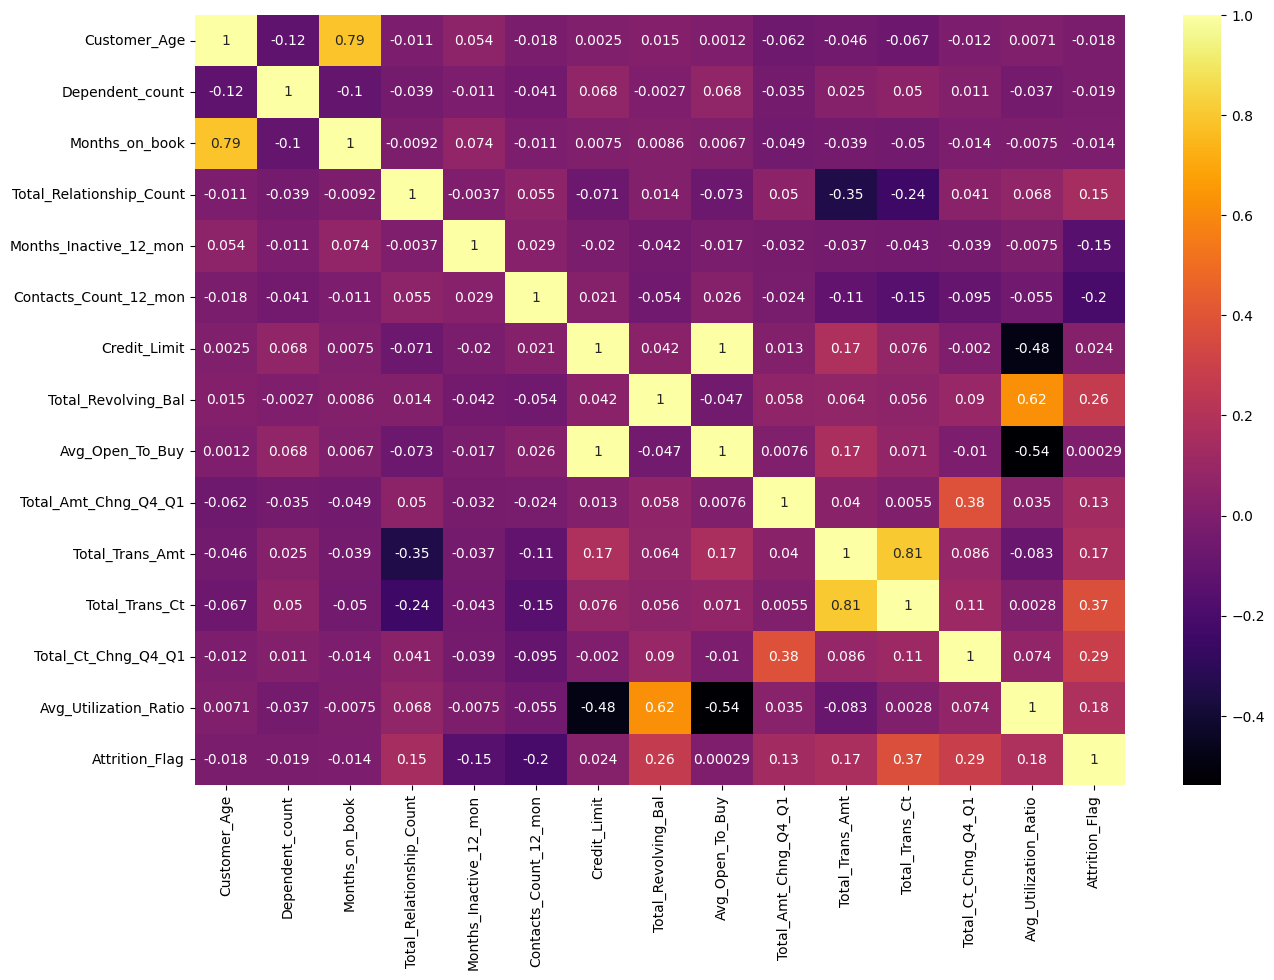

In [608]:
checkCorrFF(df)

From the heatmap above, we can drop these features:

|Feature Names|Reasons|
|-|-|
|Customer_Age|Looking at the heatmap, it correlates with 'Months_on_Book' (79%). We assumed that 'Months_on_Book' is more useful than 'Customer_Age'.|
|Credit_Limit|Looking at the heatmap, 'Credit_Limit' and 'Avg_Open_To_Buy' perfectly correlate to each other.|
|Total_Trans_Amt|Looking at the heatmap, it correlates with 'Total_Trans_Ct' (81%) and correlates with other features quite a lot.|
|Total_Amt_Chng_Q4_Q1|Looking at the heatmap, it correlates with 'Total_Ct_Chng_Q4_Q1' (38%).|
|Avg_Utilization_Ratio|Looking at the heatmap, it correlates too much with 3 features, 'Credit_Limit', 'Total_Revolving_Bal' and 'Avg_Open_To_Buy'.|

In [609]:
df.drop(['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], 
        axis=1, inplace=True)

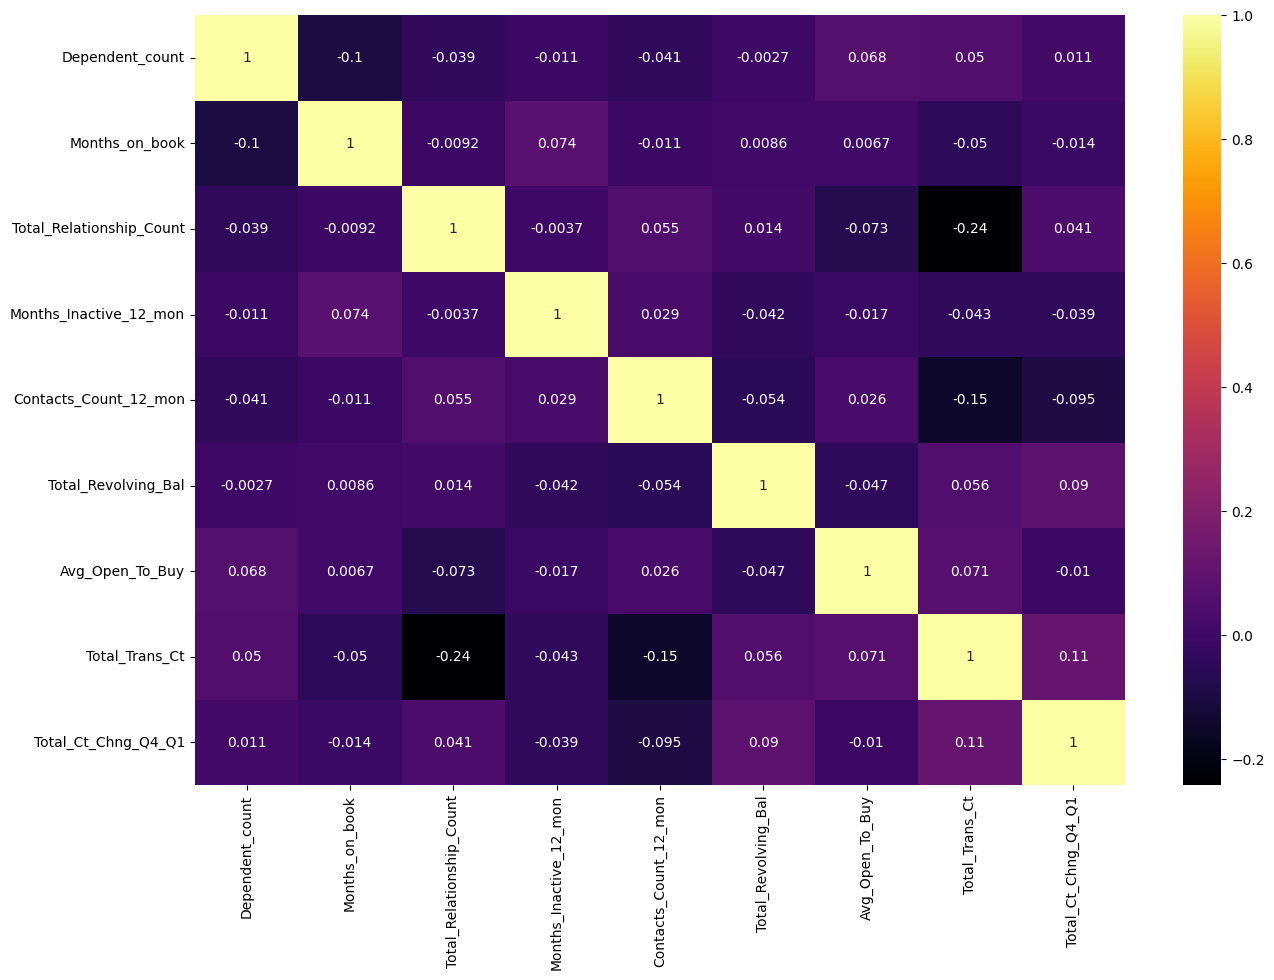

In [610]:
checkCorrFF(df.iloc[:,:-1])

## **Data Preprocessing**

### **Feature Scaling (Numerical)**

In [611]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
StandardScale_scaler = preprocessing.StandardScaler()

dfNum = df.select_dtypes(include=['int64', 'float64'])

for idx in dfNum.columns:
    if idx not in ['Attrition_Flag']:
        df[idx]=min_max_scaler.fit_transform(df[idx].values.reshape(-1,1))

In [612]:
df.describe()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.469241,0.533219,0.562516,0.390195,0.409220,0.461984,0.216328,0.425261,0.191767,0.839340
std,0.259782,0.185731,0.310882,0.168437,0.184371,0.323793,0.263399,0.181958,0.064105,0.367235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.418605,0.400000,0.333333,0.333333,0.142630,0.038290,0.271318,0.156704,1.000000
50%,0.400000,0.534884,0.600000,0.333333,0.333333,0.506953,0.100571,0.441860,0.189015,1.000000
75%,0.600000,0.627907,0.800000,0.500000,0.500000,0.708780,0.285574,0.550388,0.220248,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


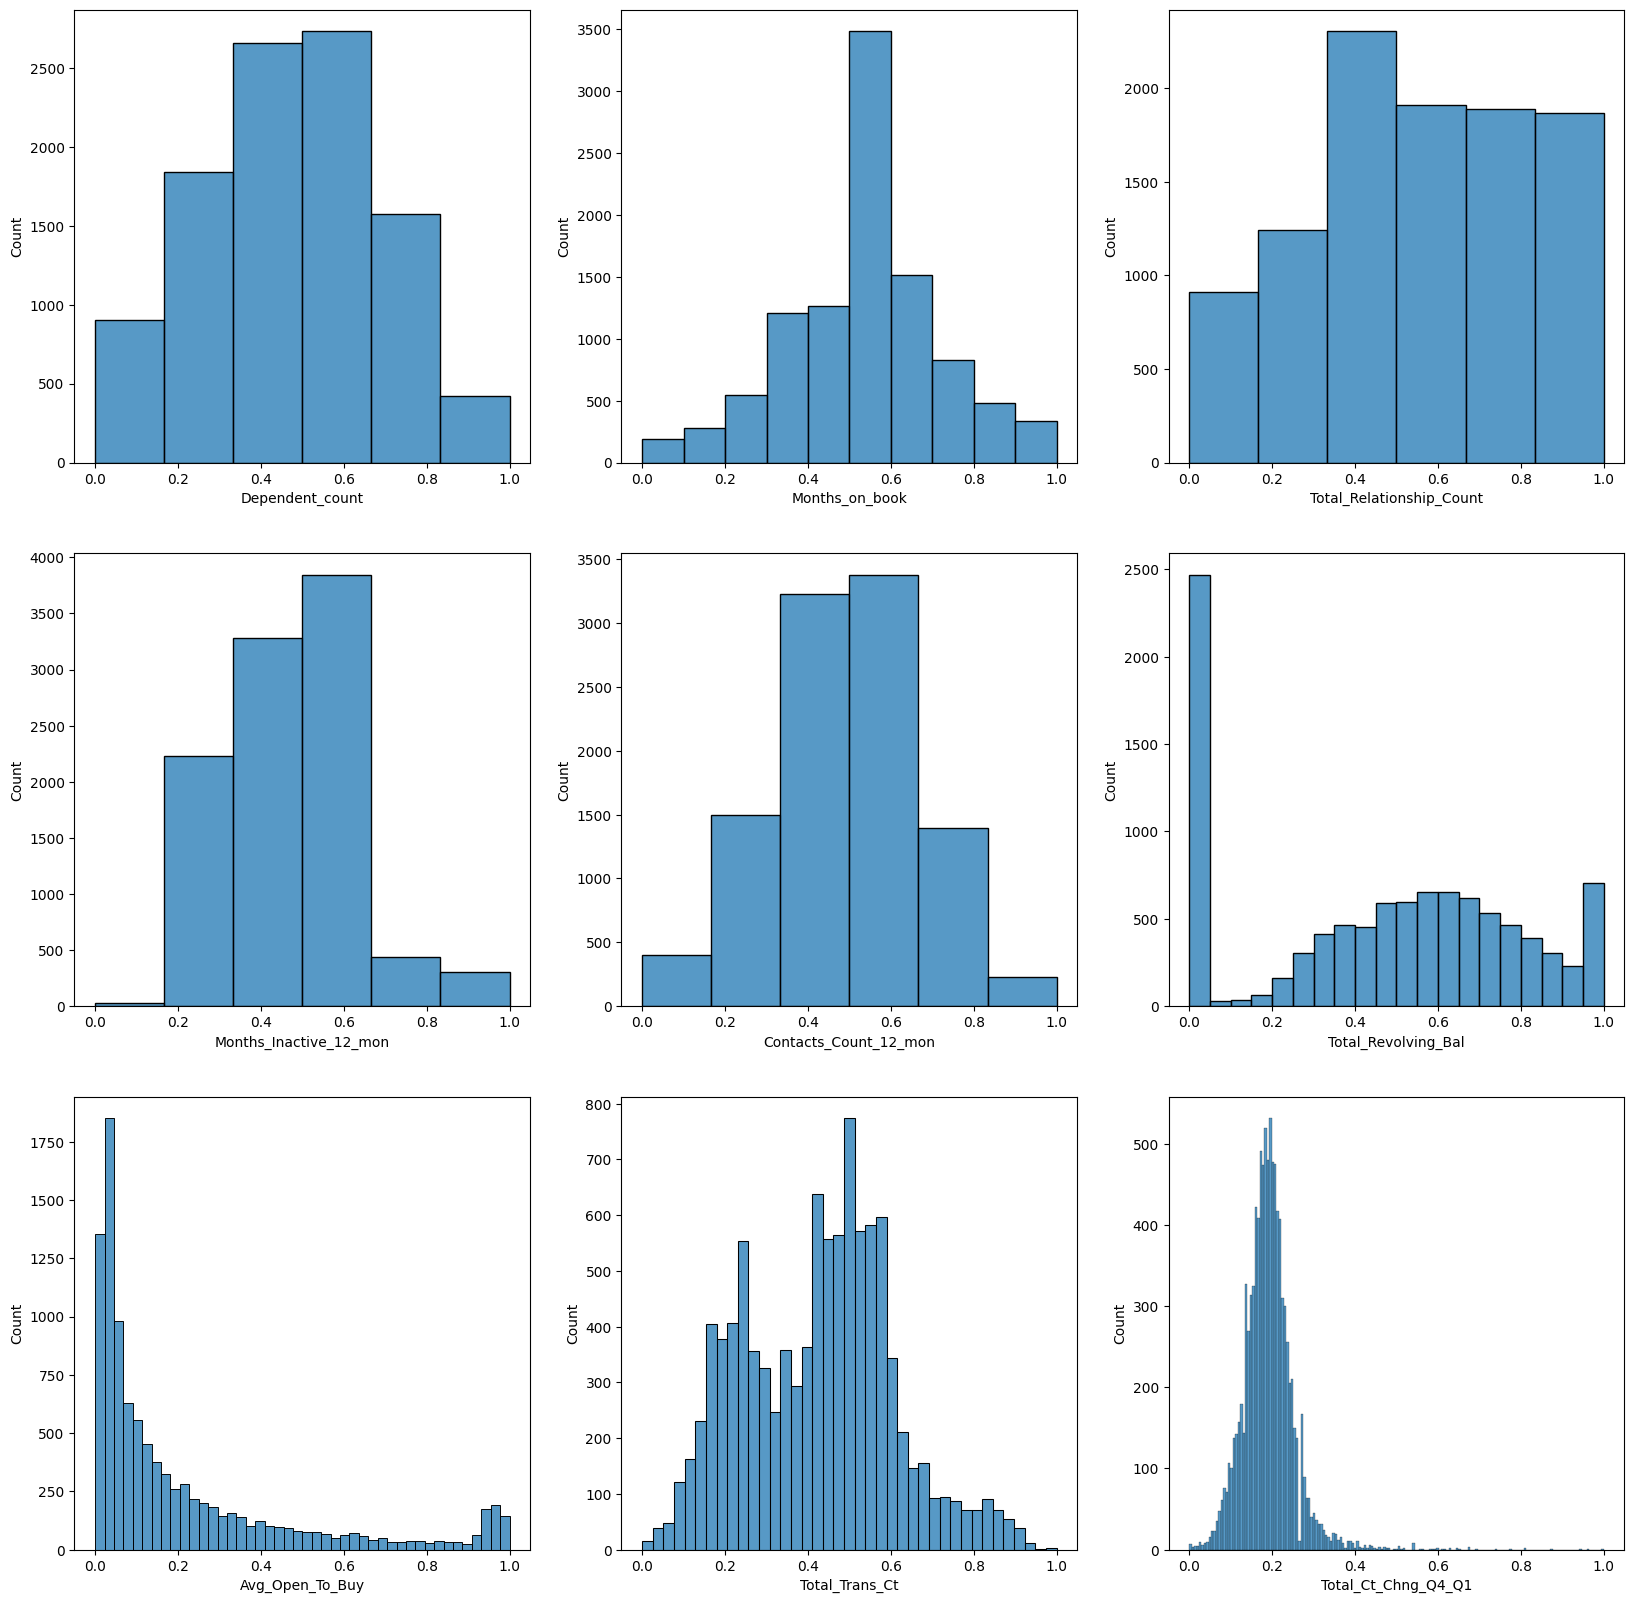

In [613]:
# plot numerical data
plt.figure(figsize=(20,20))

for idx, col in enumerate(dfNum.columns):
    if col not in ['Attrition_Flag']:
        plt.subplot(3,3,idx+1)
        if col in ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']:
            sns.histplot(df[col],bins=6)
        elif col in ['Months_on_book']:
            sns.histplot(df[col],bins=10)
        else:
            sns.histplot(df[col])

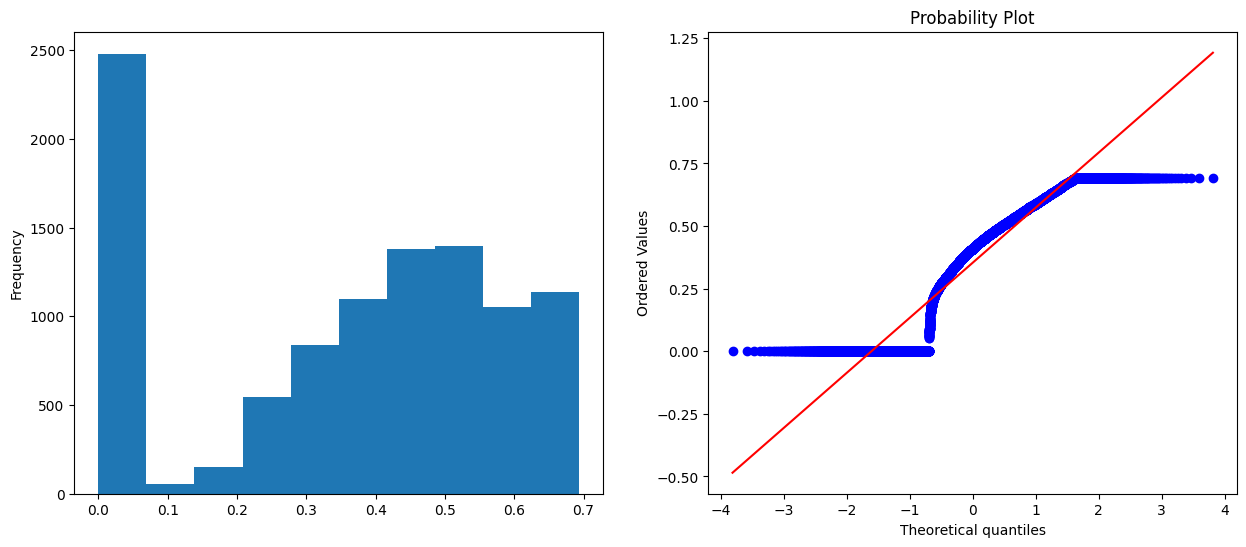

In [614]:
df['Total_Revolving_Bal']=np.log(df['Total_Revolving_Bal']+1)
diagnostic_plots(df,'Total_Revolving_Bal')

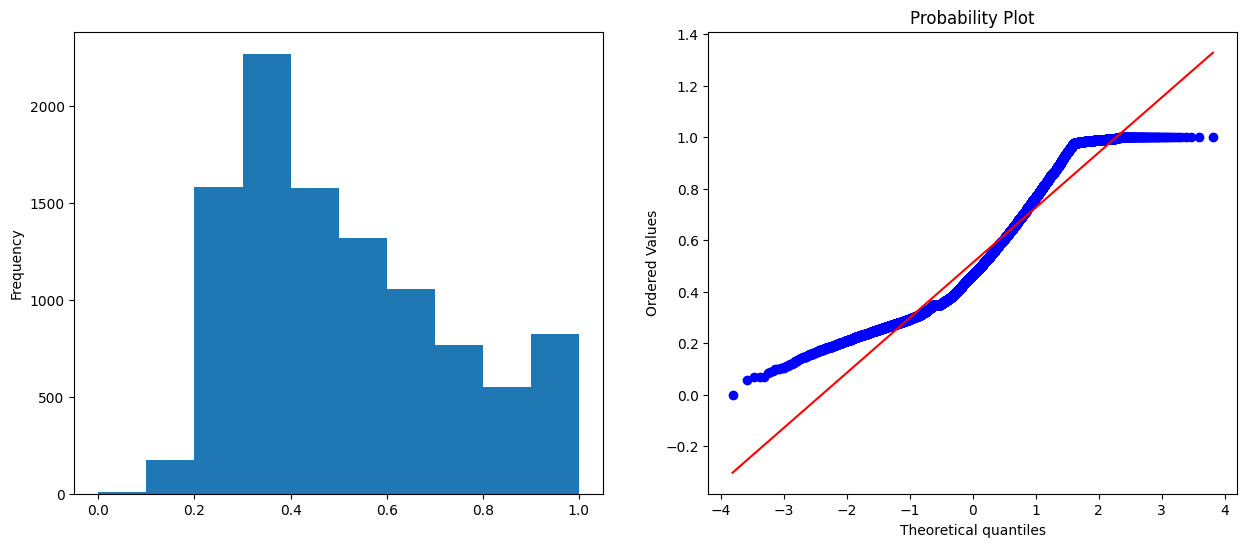

In [615]:
df['Avg_Open_To_Buy']=np.cbrt(df['Avg_Open_To_Buy'])
diagnostic_plots(df,'Avg_Open_To_Buy')

<AxesSubplot:>

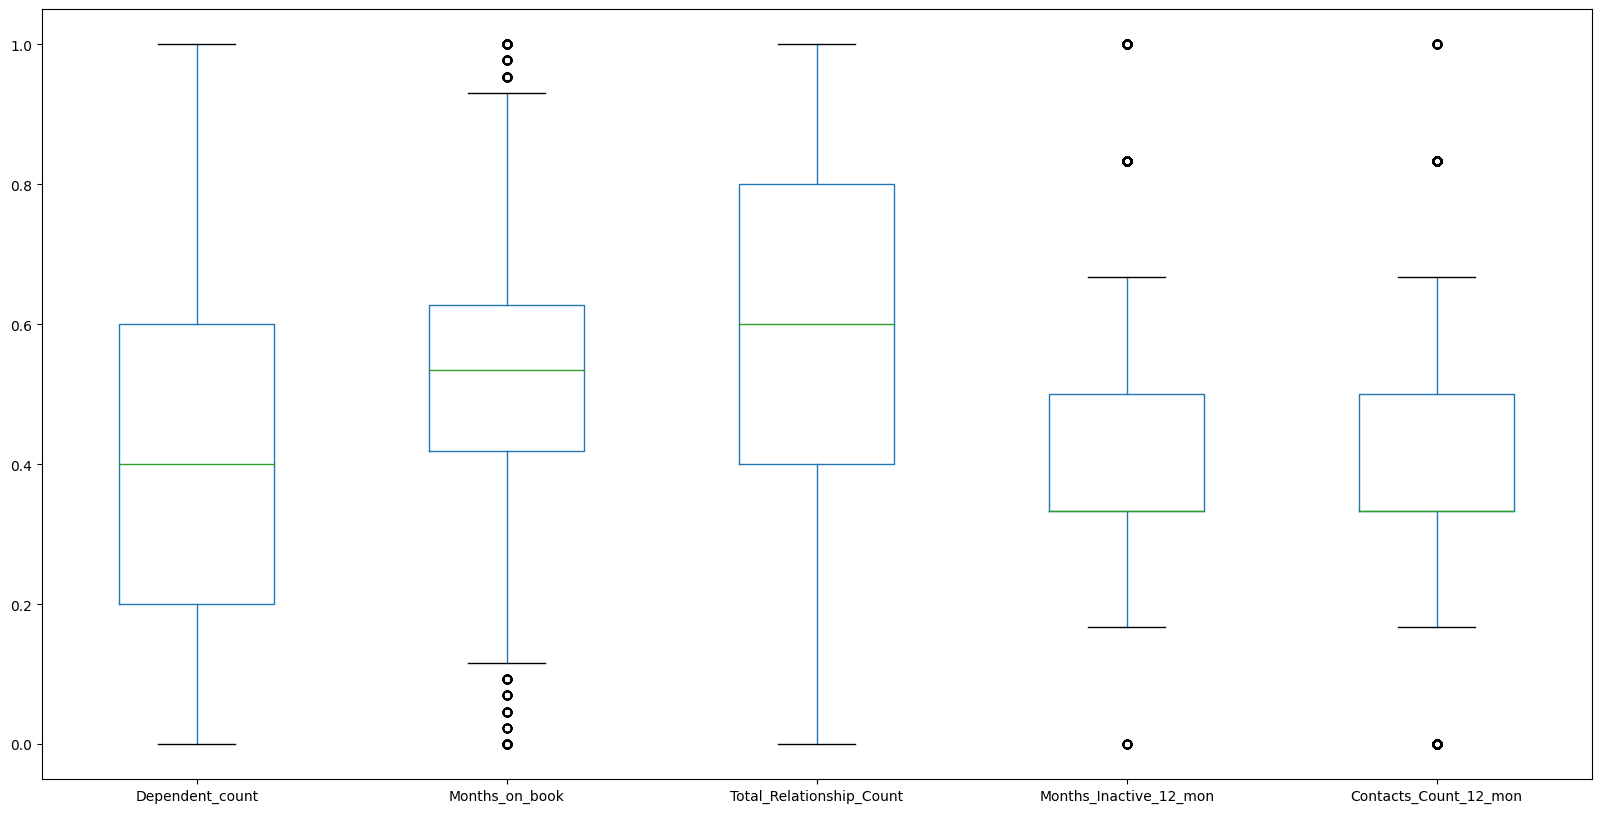

In [616]:
df.boxplot(column=[str(i) for count, i in enumerate(dfNum.columns) if i != 'Attrition_Flag' and count < 5], figsize=(20,10), grid=False)

<AxesSubplot:>

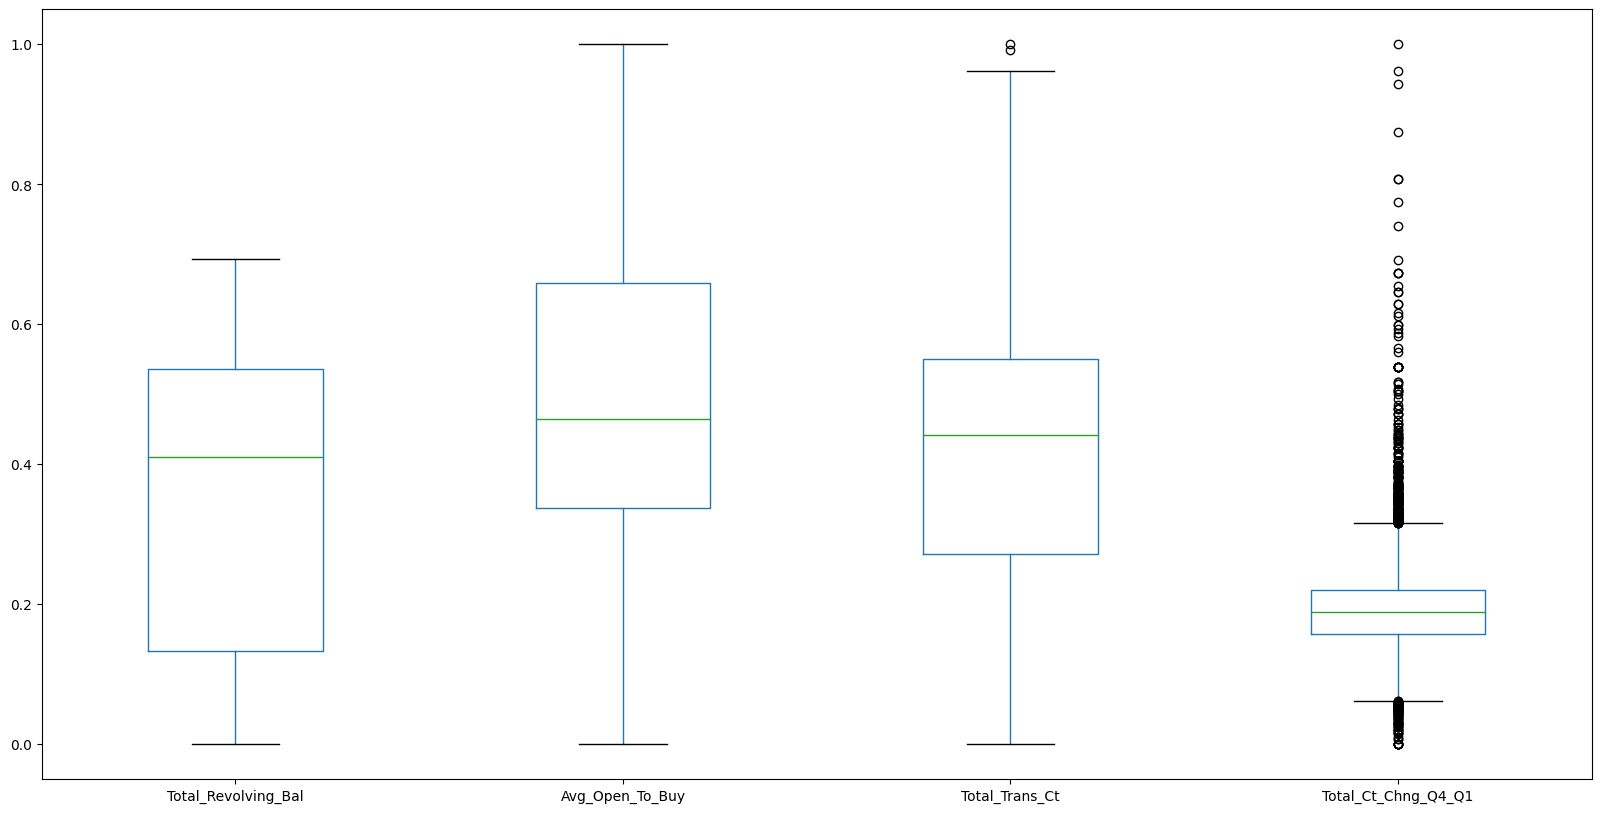

In [617]:
df.boxplot(column=[str(i) for count, i in enumerate(dfNum.columns) if i != 'Attrition_Flag' and count < 10 and count >= 5], figsize=(20,10), grid=False)

In [618]:
# for col in dfNum.columns:
#     if col not in ['Total_Ct_Chng_Q4_Q1','Months_on_book','Contacts_Count_12_mon','Months_Inactive_12_mon']:
#         df = IQRdrop(df, col)

In [619]:
df.describe()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.469241,0.533219,0.562516,0.390195,0.409220,0.353506,0.512271,0.425261,0.191767,0.839340
std,0.259782,0.185731,0.310882,0.168437,0.184371,0.233599,0.220870,0.181958,0.064105,0.367235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.418605,0.400000,0.333333,0.333333,0.133332,0.337050,0.271318,0.156704,1.000000
50%,0.400000,0.534884,0.600000,0.333333,0.333333,0.410090,0.465040,0.441860,0.189015,1.000000
75%,0.600000,0.627907,0.800000,0.500000,0.500000,0.535780,0.658526,0.550388,0.220248,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.693147,1.000000,1.000000,1.000000,1.000000


### **One-Hot Encoding**

In [620]:
df

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,0.6,0.604651,0.8,0.166667,0.500000,0.269035,0.701437,0.248062,0.437534,M,High School,Married,$60K - $80K,Blue,1
1,1.0,0.720930,1.0,0.166667,0.333333,0.295104,0.598229,0.178295,1.000000,F,Graduate,Single,Less than $40K,Blue,1
2,0.6,0.534884,0.6,0.166667,0.000000,0.000000,0.462526,0.077519,0.628164,M,Graduate,Married,$80K - $120K,Blue,1
3,0.8,0.488372,0.4,0.666667,0.166667,0.693147,0.284291,0.077519,0.628164,F,High School,Unknown,Less than $40K,Blue,1
4,0.6,0.186047,0.8,0.166667,0.000000,0.000000,0.514958,0.139535,0.673129,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.4,0.627907,0.4,0.333333,0.500000,0.551238,0.396355,0.829457,0.230749,M,Graduate,Single,$40K - $60K,Blue,1
10123,0.4,0.279070,0.6,0.333333,0.500000,0.625133,0.392569,0.457364,0.183899,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,0.2,0.534884,0.8,0.500000,0.666667,0.000000,0.539053,0.387597,0.220248,F,High School,Married,Less than $40K,Blue,0
10125,0.4,0.534884,0.6,0.500000,0.500000,0.000000,0.534764,0.403101,0.194400,M,Graduate,Unknown,$40K - $60K,Blue,0


In [621]:
x = df.drop(['Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']
x = pd.get_dummies(x)

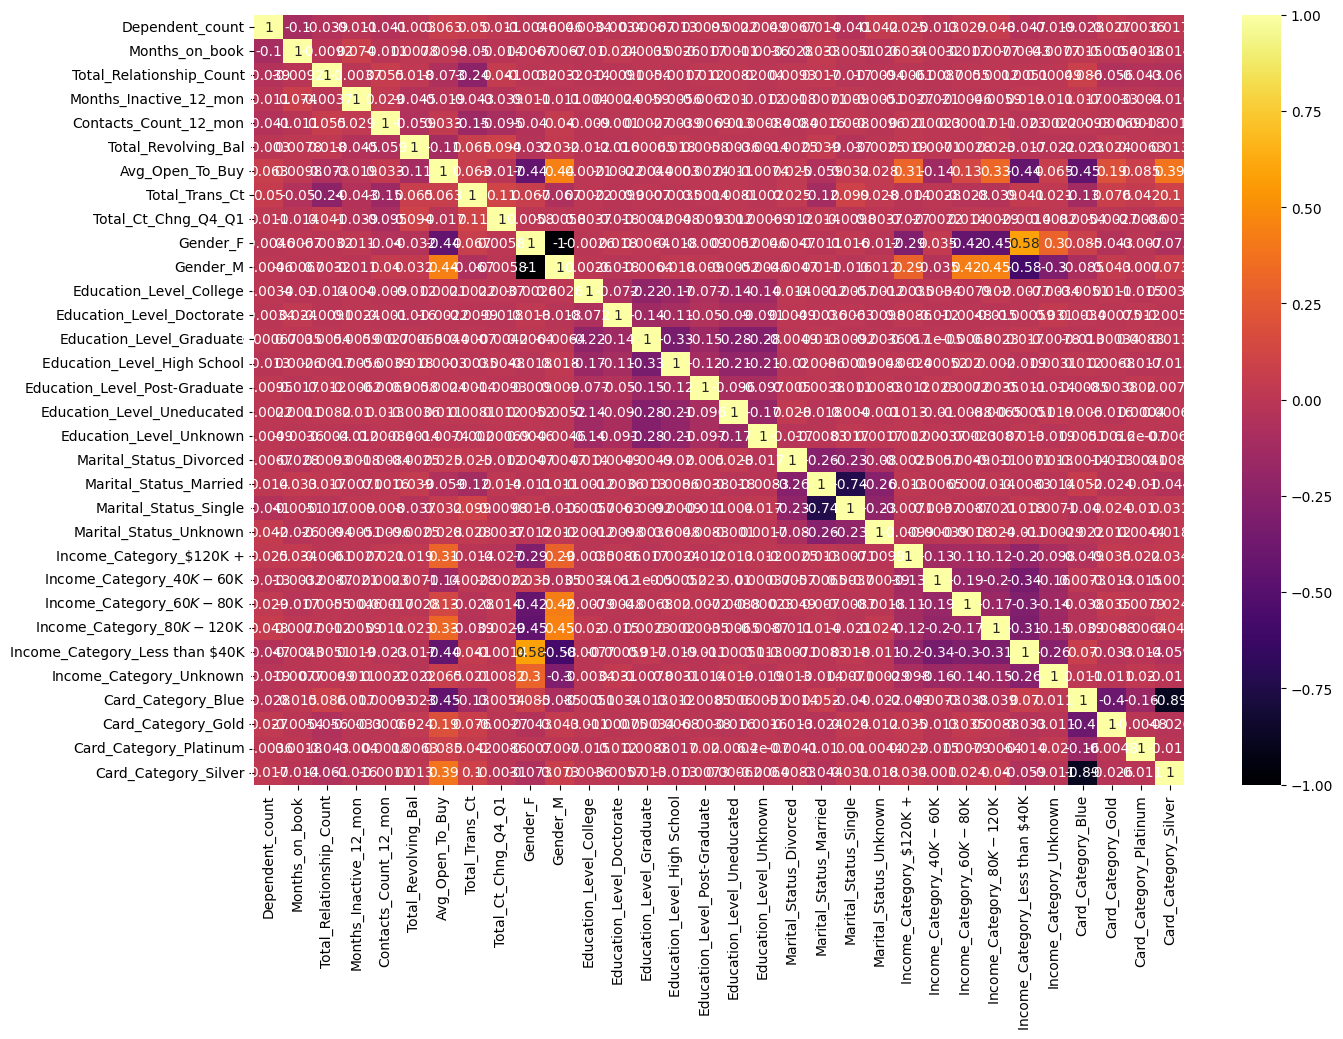

In [622]:
checkCorrFF(x)

### **Feature Selection**

In [623]:
selector = SelectKBest(chi2, k=20)
df_new = selector.fit(x, y)

col = selector.get_support(indices=True)
df_new = x.iloc[:,col]

### **Concatenate Data**

In [624]:
df = pd.concat([df_new, y], axis=1)

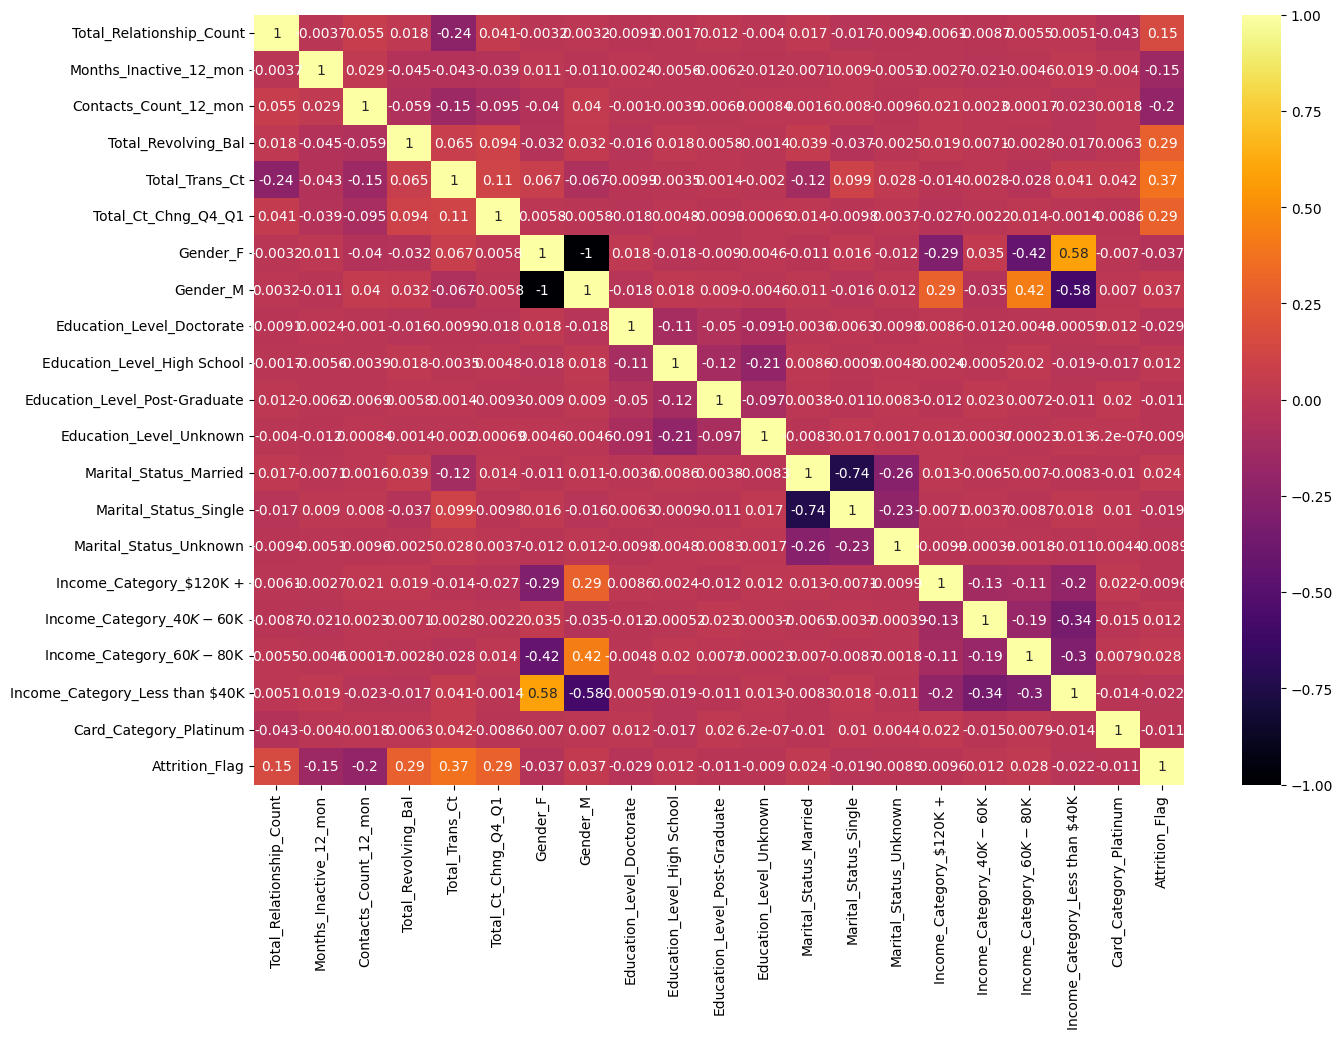

In [625]:
checkCorrFF(df)

In [626]:
df.drop(['Gender_F','Marital_Status_Married'], axis=1, inplace=True)

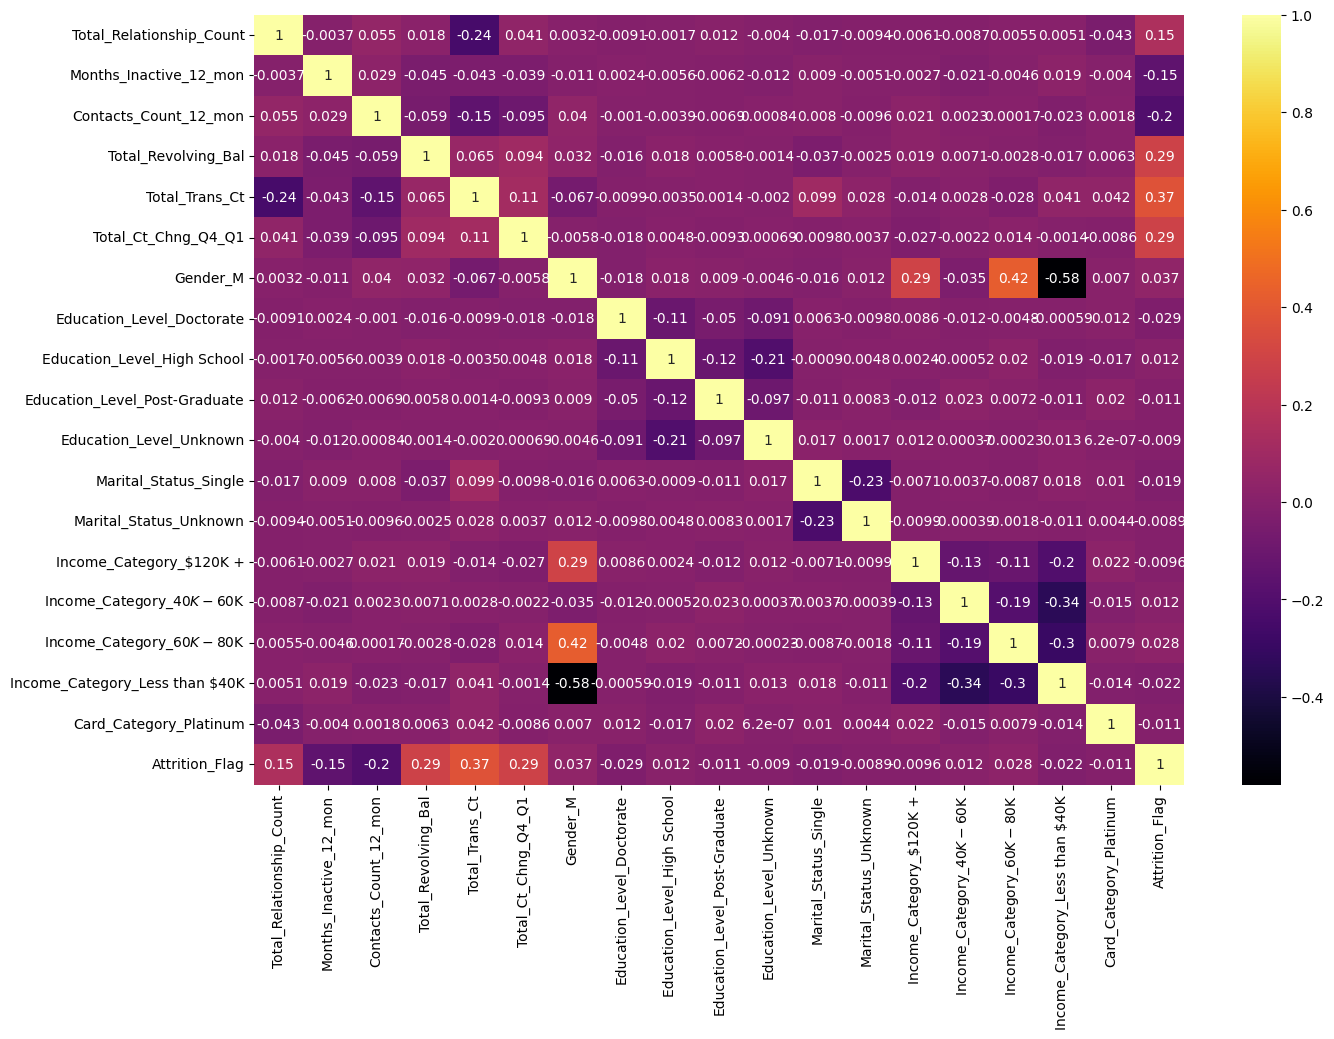

In [627]:
checkCorrFF(df)

## **Model Training**

In [628]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer':0})
#get the dummy variables for the categorical variables
x = df.drop(['Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

clf = LogisticRegression()
clf.fit(x,y)
print("model score: %.8f" % clf.score(x_test, y_test))

model score: 0.90078973


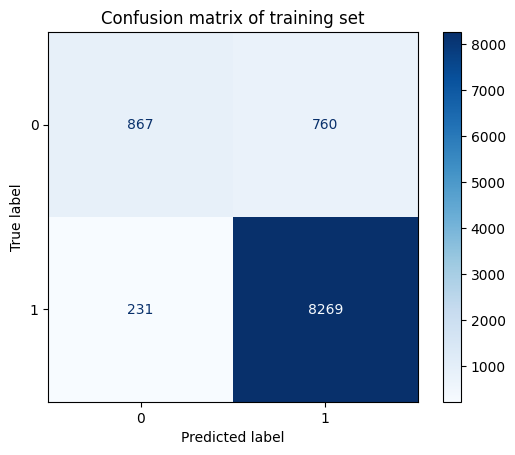

In [629]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      x,
                      y,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [630]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf.predict(x)
print("Classification report \n=======================")
print(classification_report(y_true=y, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.79      0.53      0.64      1627
           1       0.92      0.97      0.94      8500

    accuracy                           0.90     10127
   macro avg       0.85      0.75      0.79     10127
weighted avg       0.90      0.90      0.89     10127

Confusion matrix 
[[ 867  760]
 [ 231 8269]]
